In [16]:
include("../src/Autoencoder.jl")
using Flux.Data.MNIST
using Base.Iterators: partition
using Juno: @progress

 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]


In [2]:
#Data and parameters preparation
imgs = MNIST.images();

# Partition into batches of size 1000
data = [float(hcat(vec.(imgs)...)) for imgs in partition(imgs, 1000)];
N = 32; # Size of the encoding

In [ ]:
autoencoder = AutoEncoder(28^2,N)
train(autoencoder,data)

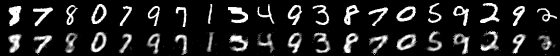

In [22]:
# Sample output
using Images

img(x::Vector) = Gray.(reshape(clamp.(x, 0, 1), 28, 28))

function sample()
  # 20 random digits
  before = [imgs[i] for i in rand(1:length(imgs), 20)]
  # Before and after images
  after = img.(map(x -> cpu(autoencoder._model)(float(vec(x))).data, before))
  # Stack them all together
  hcat(vcat.(before, after)...)
end

cd(@__DIR__)

sample()